In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import pandas as pd
import os 
from datetime import date 
from time import strftime 

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Cleaning and shit 

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn[1].csv')

df.columns = [col.strip() for col in df.columns]

In [3]:
# df=df[df.duplicated() == True].count()

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
for column in df.columns:
    print(f"Values in {column} ", df[column].unique()) 
    print(df[column].value_counts(normalize=True))

Values in customerID  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
2595-KIWPV    0.000142
7409-KIUTL    0.000142
8755-OGKNA    0.000142
9305-CDSKC    0.000142
9350-ZXYJC    0.000142
                ...   
5868-YWPDW    0.000142
6131-JLWZM    0.000142
0993-OSGPT    0.000142
7647-GYYKX    0.000142
5356-CSVSQ    0.000142
Name: customerID, Length: 7043, dtype: float64
Values in gender  ['Female' 'Male']
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
Values in SeniorCitizen  [0 1]
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
Values in Partner  ['Yes' 'No']
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
Values in Dependents  ['No' 'Yes']
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
Values in tenure  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df=df.drop('customerID', axis=1)

### Further cleaning 

In [8]:
df['yes_churn'] = np.where(df['Churn'] != 0, 1, 0)

In [9]:
(df.Churn == " ").sum()

0

In [10]:
(df.TotalCharges == " ").sum()

11

In [11]:
#customers with zeros for total charge 
total_charges = df[df.TotalCharges != " "]
total_charges.shape

(7032, 21)

### Data Analysis

In [12]:
total_charges.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [13]:
total_charges.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [14]:
df = total_charges

### Catagorical Data with Vis.

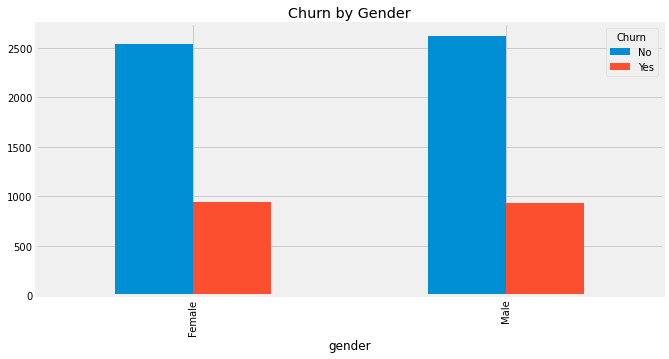

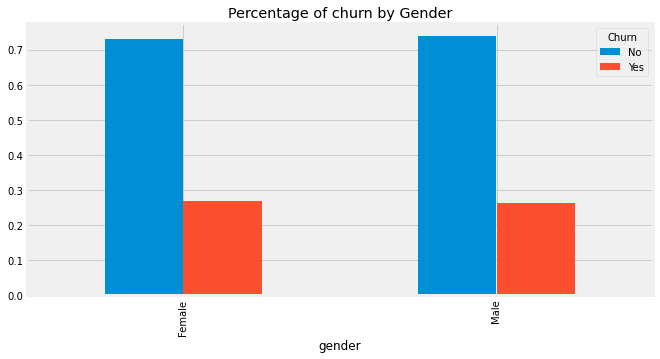

In [15]:
# churn by gender---pretty much 50/50 wont use as predictor 
gender = df.groupby('gender')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
gender.set_title("Churn by Gender")
plt.show()
gender_pct = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
gender_pct.set_title("Percentage of churn by Gender")
plt.show()

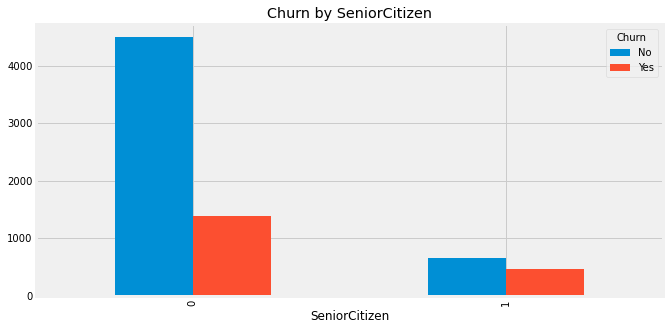

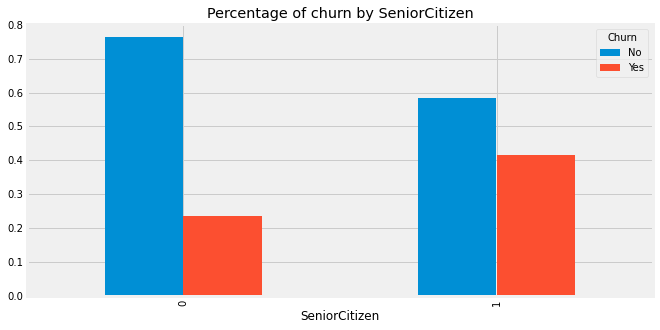

In [16]:
# churn by senior citizens ---- 42% of seniors churn compared to the 24% average 
senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
senior.set_title("Churn by SeniorCitizen")
plt.show()
senior_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
senior_pct.set_title("Percentage of churn by SeniorCitizen")
plt.show()

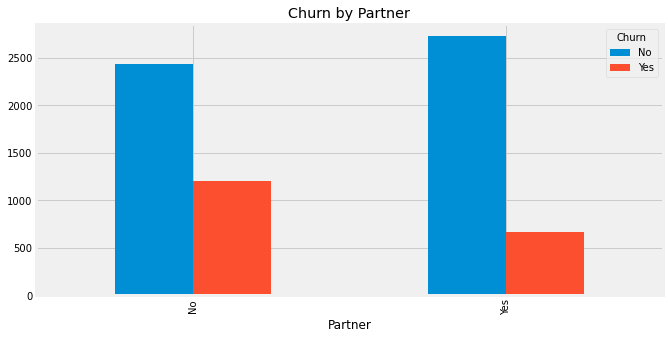

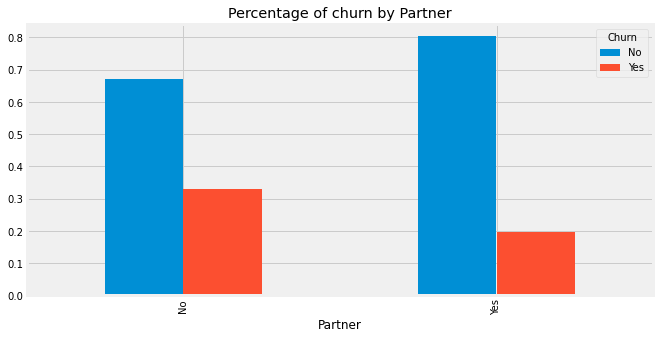

In [17]:
#33% of single people churn. only 20% of people with partners churn 
partner = df.groupby('Partner')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
partner.set_title("Churn by Partner")
plt.show()
partner_pct = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
partner_pct.set_title("Percentage of churn by Partner")
plt.show()

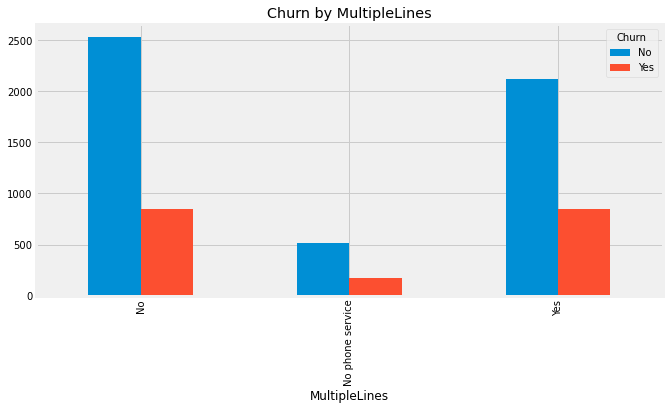

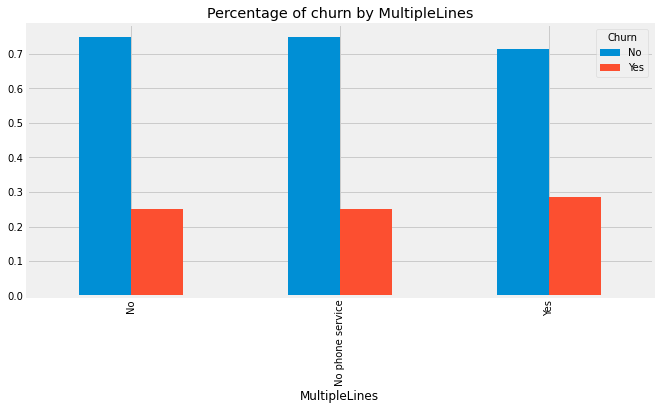

In [18]:
#not a big difference between the three. But, those with multiple lines do have a churn of 29% compared to 25%.
mplines = df.groupby('MultipleLines')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("Churn by MultipleLines")
plt.show()
mplines_pct = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of churn by MultipleLines")
plt.show()


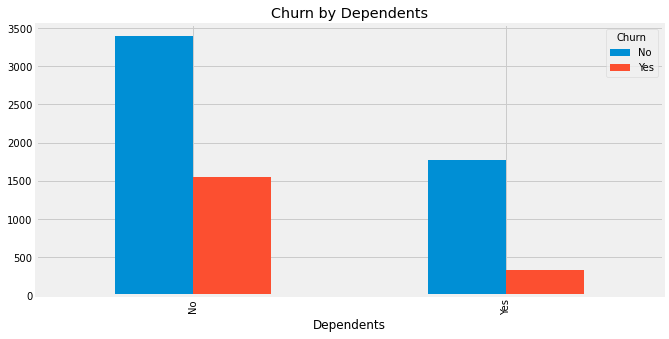

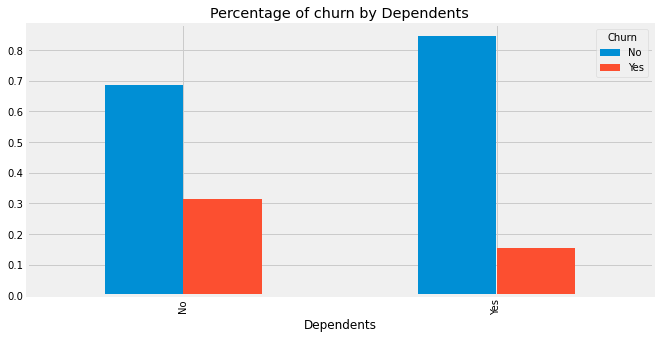

In [19]:
#Those with no dependents have a churn rate of 31% while those with dependents have one that is 16%
dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
dependents.set_title("Churn by Dependents")
plt.show()
dependents_pct = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
dependents_pct.set_title("Percentage of churn by Dependents")
plt.show()

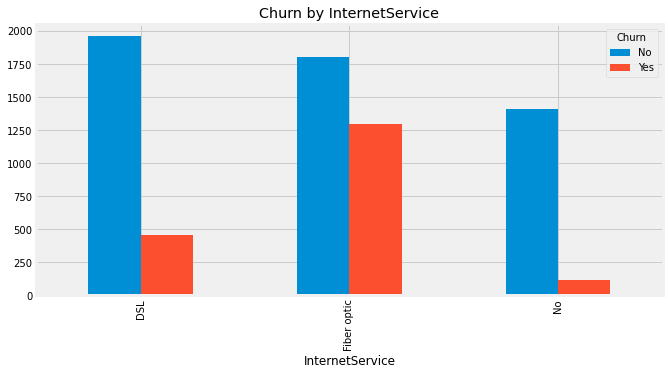

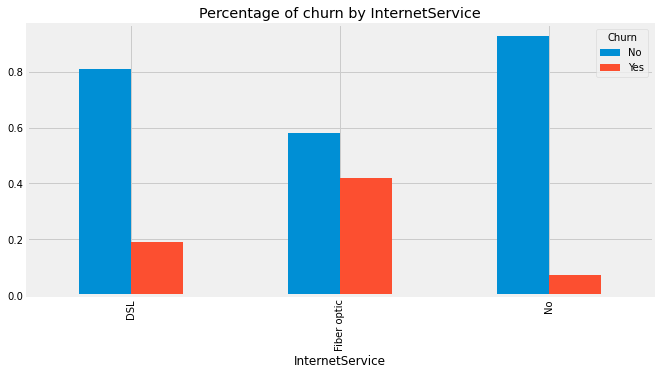

In [20]:
#DSL is at a 19% churn. Fiber Optic is at a 41% churn. Then those without have a 7% churn. 
internet = df.groupby('InternetService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
internet.set_title("Churn by InternetService")
plt.show()
internet_pct = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
internet_pct.set_title("Percentage of churn by InternetService")
plt.show()

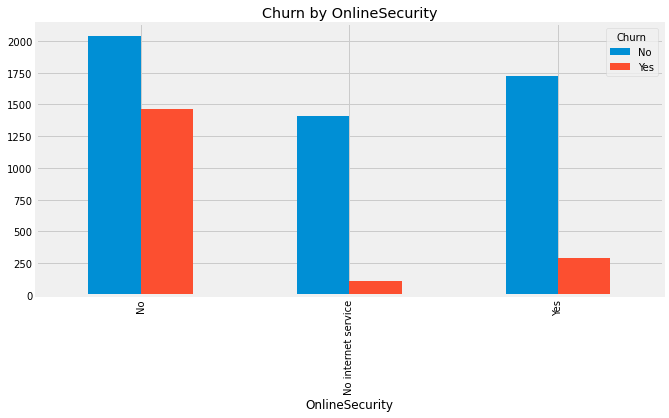

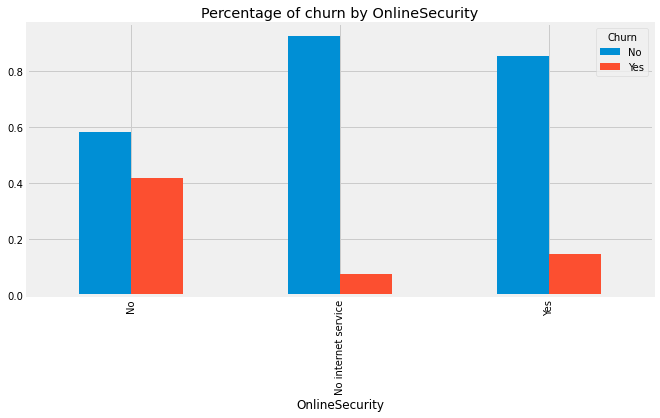

In [21]:
#None is a 42% churn, No internet is 7% churn, and yes is a 15% churn. 
security = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
security.set_title("Churn by OnlineSecurity")
plt.show()
security_pct = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
security_pct.set_title("Percentage of churn by OnlineSecurity")
plt.show()

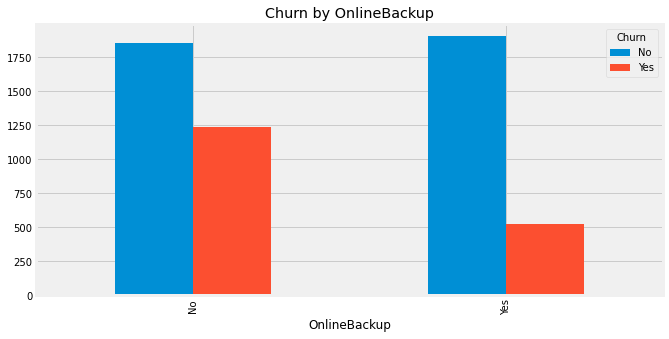

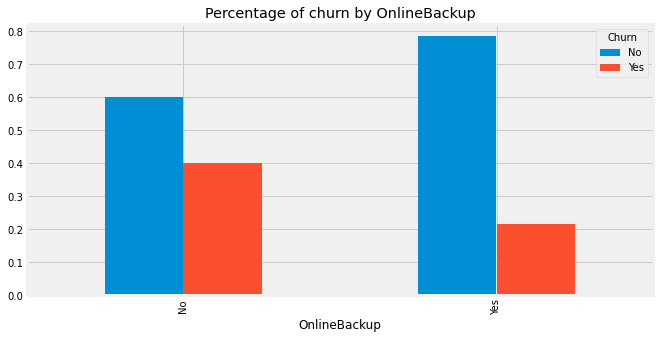

In [22]:
#people with no backup are 44% of all the data, while those with backup represent 27%. The rest is people without internet. 
#Those without backup have a churn of 40%, while those with backup have a churn of 22%. 
backup = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
backup.set_title("Churn by OnlineBackup")
plt.show()
backup_pct = df[df['OnlineBackup'] != 'No internet service'].groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
backup_pct.set_title("Percentage of churn by OnlineBackup")
plt.show()

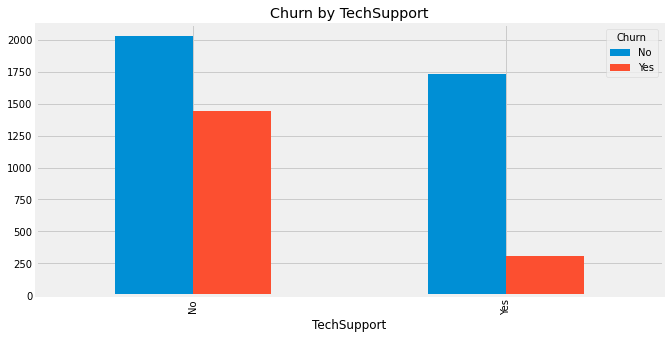

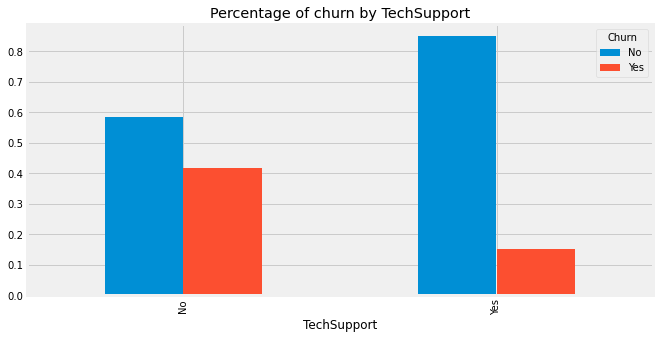

In [23]:
# Customers without a tech support represent almost half (49%) of the total customers while the ones with tech support represent 
# 29% of the total customers (the rest being customers without internet service).
#-----The churn without techsupport is 41% while the people with tech support have a churn of 15%
support = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
support.set_title("Churn by TechSupport")
plt.show()
support_pct = df[df['TechSupport'] != 'No internet service'].groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
support_pct.set_title("Percentage of churn by TechSupport")
plt.show()

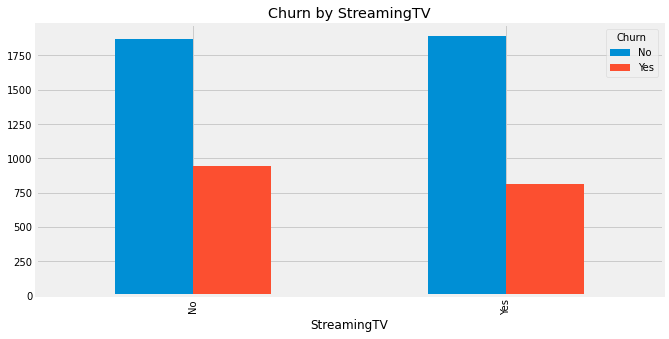

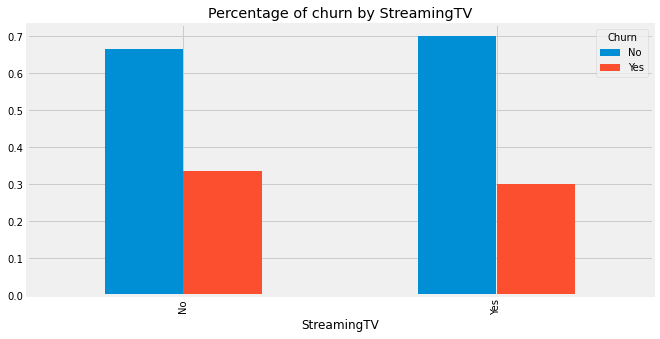

In [24]:
# no significance when comaping the two. 32%-33% churn without streaming then 30% with streaming. 
tv = df[df['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
tv.set_title("Churn by StreamingTV")
plt.show()
tv_pct = df[df['StreamingTV'] != 'No internet service'].groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
tv_pct.set_title("Percentage of churn by StreamingTV")
plt.show()

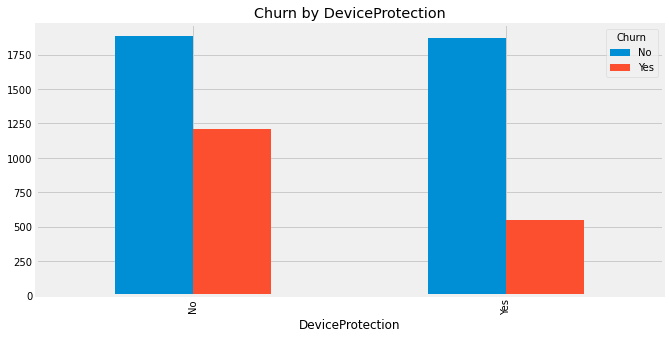

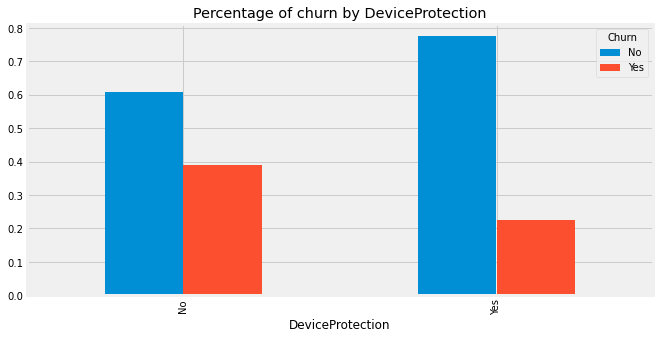

In [25]:
# Churn rate for no protection is 38-39% while those with protection is 23%.
prtct = df[df['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
prtct.set_title("Churn by DeviceProtection")
plt.show()
prtct_pct = df[df['DeviceProtection'] != 'No internet service'].groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
prtct_pct.set_title("Percentage of churn by DeviceProtection")
plt.show()

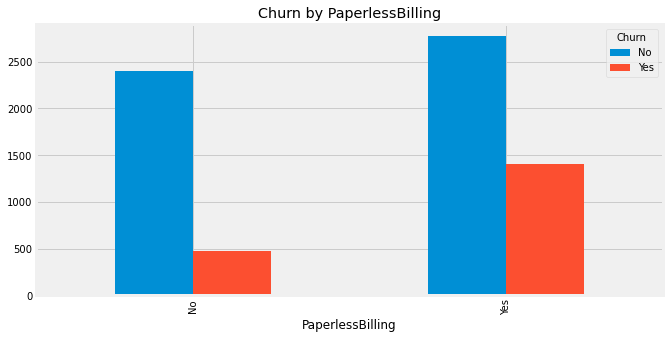

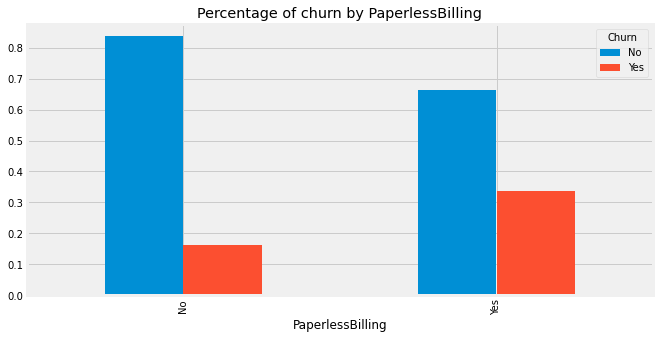

In [26]:
# There is a higher churn with paperless billing. The churn rate is 35% with paper billing and 16-17% with paper billing. 
bill = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
bill.set_title("Churn by PaperlessBilling")
plt.show()
bill_pct = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
bill_pct.set_title("Percentage of churn by PaperlessBilling")
plt.show()

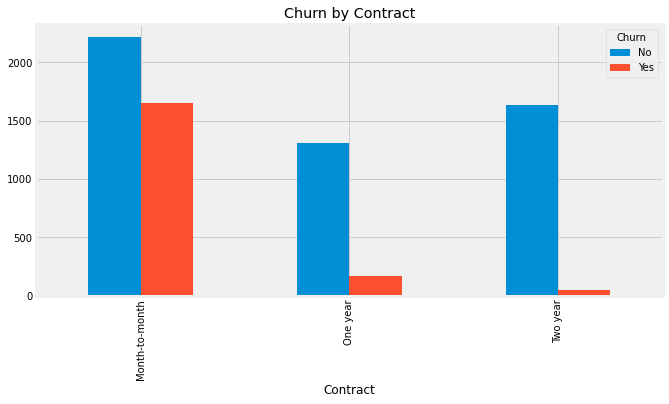

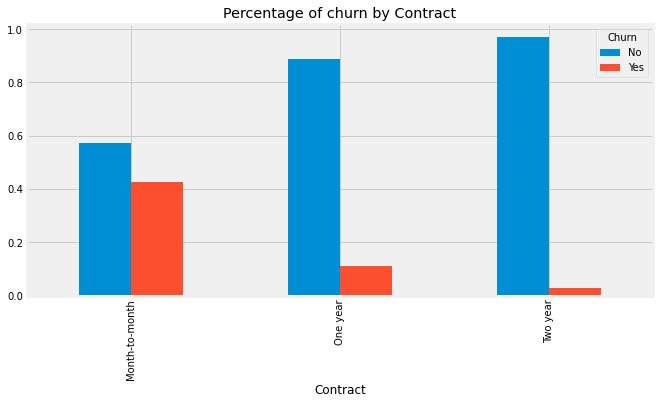

In [27]:
# There is a 43% churn rate with the month to month, a 10-11% with the one year
# , and a 3% with the two year. Rolling contracts have a better churn rate.
contract = df.groupby('Contract')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
contract.set_title("Churn by Contract")
plt.show()
contract_pct = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
contract_pct.set_title("Percentage of churn by Contract")
plt.show()

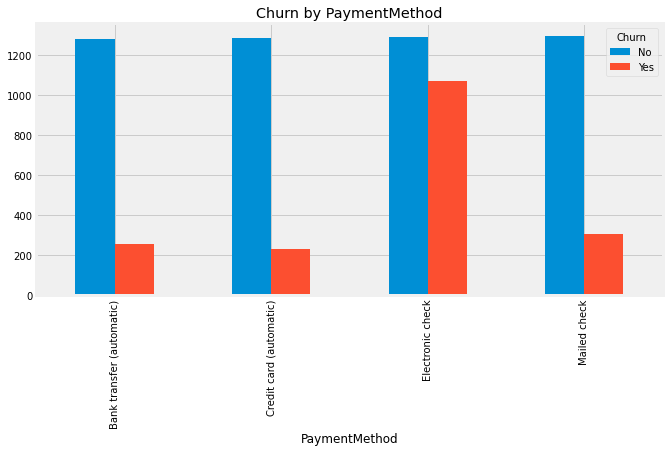

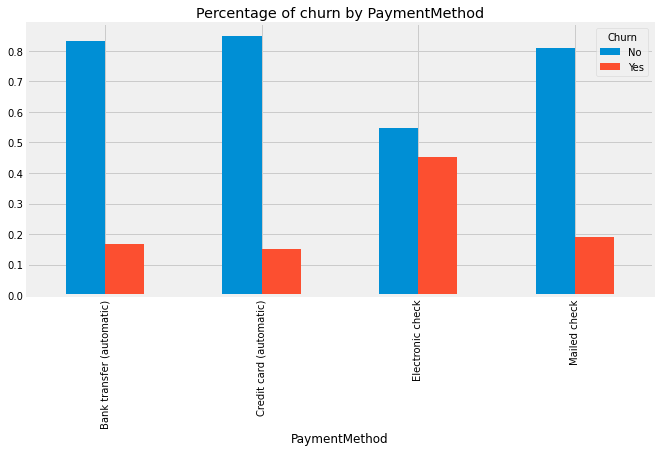

In [28]:
# electronic check has the highest churn at 45%. 
payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
payment.set_title("Churn by PaymentMethod")
plt.show()
payment_pct = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
payment_pct.set_title("Percentage of churn by PaymentMethod")
plt.show()

### Numerical

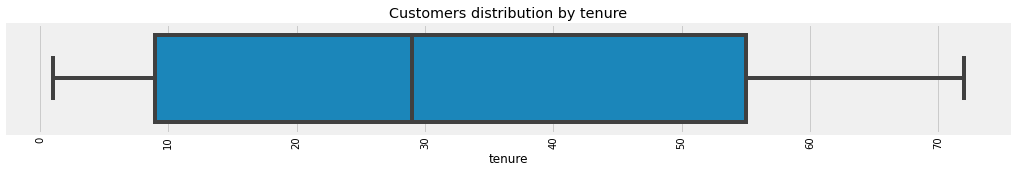

In [29]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
dist_age = sns.boxplot(x=df.tenure)
dist_age.set_title("Customers distribution by tenure")
plt.show()

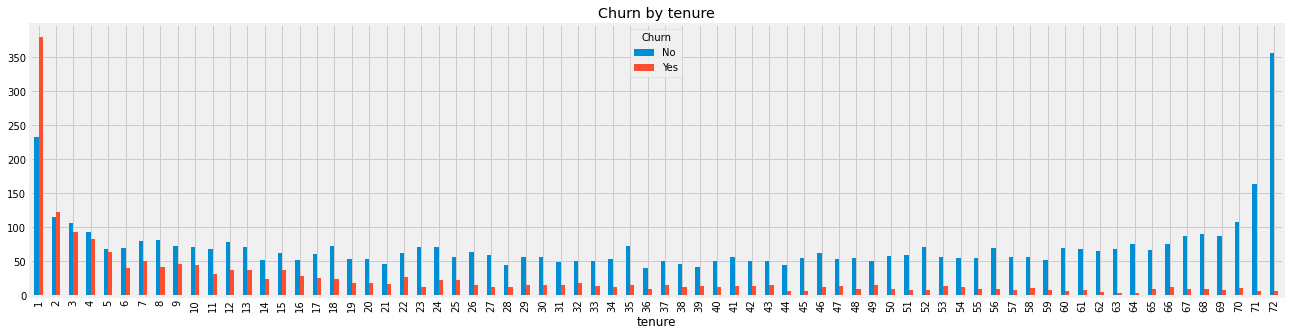

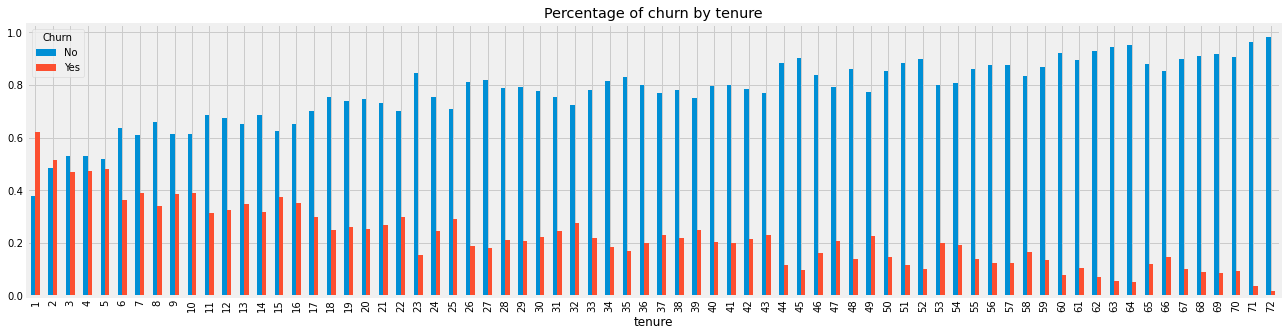

In [30]:
# Tenures and their respective churn. The longer the supscription the more likely they are to stay. 
tenure = df.groupby('tenure')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(20,5))
tenure.set_title("Churn by tenure")
plt.show()
tenure_pct = df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
tenure_pct.set_title("Percentage of churn by tenure")
plt.show()

##### monthly charges 

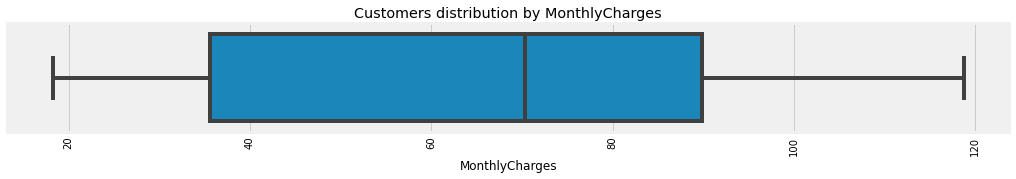

In [31]:
# average is around 70 and most charges stay in between 35$-90$  
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
mth = sns.boxplot(x=df.MonthlyCharges)
mth.set_title("Customers distribution by MonthlyCharges")
plt.show()

##### Numeric df

In [32]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [33]:
df.shape

(7032, 21)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [35]:
numeric_df = df[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']]
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'yes_churn'],
      dtype='object')

##### Converting Catagorical Variables 

In [37]:
categorical_df = df[[ 'gender', 'Partner', 'Dependents','PhoneService','MultipleLines'
                 ,'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']]

# catagorical_df = df[['customerID', 'gender', 'Partner', 'Dependents','PhoneService ','MultipleLines'
#                   ,'InternetService ','OnlineSecurity','OnlineBackup','DeviceProtection',
#                   'TechSupport','StreamingTV ','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

In [38]:
encoded_df = pd.get_dummies(categorical_df)
encoded_df

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [39]:
joined_df = pd.concat([numeric_df, encoded_df], axis=1, join='inner')

In [40]:
joined_df.shape

(7032, 47)

In [41]:
joined_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


### Spliting data

In [42]:
df['log_churn'] = np.log(df['yes_churn'])

In [43]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [44]:
y= joined_df['Churn_Yes']
X= joined_df.drop(['Churn_No','Churn_Yes'], axis=1)

##### Train Test Split

In [45]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2021)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state =42)

##### Val Train Test Split

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2021)

### Model Function 

In [47]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

### First Model

In [48]:
logreg = LogisticRegression()

In [49]:
logreg = modeling_function(logreg, X_train, y_train, X_val, y_val)

Training accuracy:  0.806496062992126
Validation accuracy:  0.8037904124860646


In [50]:
y_pred = logreg.predict(X_test)

In [51]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6040,0,1,70.75,70.75,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2079,0,70,106.05,7554.05,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2108,0,46,44.95,2168.90,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1715,0,46,19.40,967.85,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
6276,0,15,20.35,335.95,1,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,0,5,75.15,392.65,0,1,1,0,1,0,...,1,1,0,0,1,0,1,0,0,0
2189,0,69,24.45,1718.20,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1133,0,2,19.25,48.35,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
3326,1,38,70.15,2497.35,0,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


##### confusion matrix

In [52]:
cnf_matrix = confusion_matrix(y_train, logreg.predict(X_train))
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[3368  380]
 [ 603  729]]


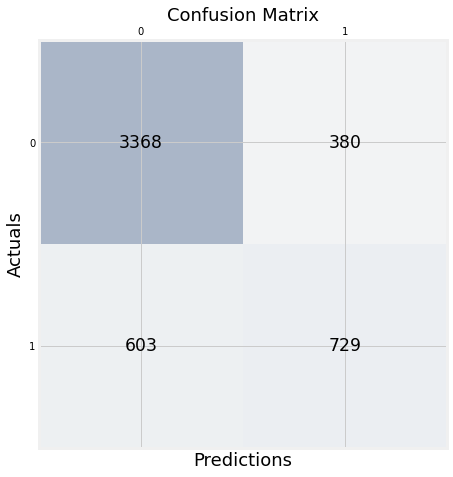

In [53]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [54]:
y.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

In [55]:
!pip install imblearn

In [56]:
#SMOTE
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE(random_state=2021)

In [58]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [59]:
y.value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

##### further info on matrix

In [60]:
#accuracy = TP + TN / TP + TN + FP + FN
accuracy = (3368+729)/(3368+729+380+221)
accuracy

0.8720732226479353

In [61]:
#percision = TP/TP + FP
percision = (3368)/(3368+380)
percision

0.8986125933831377

In [62]:
from sklearn.metrics import recall_score

In [63]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [64]:
y_test

5868    0
163     0
5929    0
2886    0
3934    0
       ..
5103    0
903     0
4962    0
370     0
1074    0
Name: Churn_Yes, Length: 1055, dtype: uint8

In [65]:
recall_score(y_test, y_pred)

0.5454545454545454

In [66]:
#recall = TP/TP + FN ----- just focus on recall. We need to get rid of  false negatives. 
recall = (3368)/(3368+603)
recall 

0.8481490808360614

### Second Model 

In [67]:
logreg2 = LogisticRegression()

In [68]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression()

In [69]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val, y_val)

Training accuracy:  0.8383137673425827
Validation accuracy:  0.7881828316610925


##### confusion matrix #2

In [70]:
from sklearn.metrics import plot_confusion_matrix

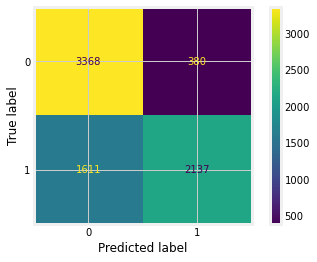

In [71]:
plot_confusion_matrix(logreg, X_train_res, y_train_res)

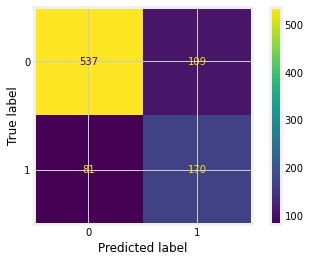

In [72]:
#validation set 
plot_confusion_matrix(logreg2, X_val, y_val)

### Third Model 